In [31]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
from PIL import Image
from tqdm import tqdm
import cv2
import pandas
import os
import random

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.layers import Conv2D , Input,SeparableConv2D,AveragePooling2D,BatchNormalization,Activation
from keras.models import Sequential

In [2]:
data = "Images(Image Size - 500)"

folders = os.listdir(data)

print(folders)

['Airoplane', 'Bus', 'Butterfly', 'Car', 'Cat', 'Dog', 'Elephant', 'Flower', 'Horse', 'Motorbike']


In [3]:
image_names = []
train_labels = []
train_images = []

size = 64,64

for folder in folders:
    for file in tqdm(os.listdir(os.path.join(data,folder))):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue
      

100%|███████████████████████████████████████████████████████████████████████████████| 788/788 [00:06<00:00, 122.04it/s]


In [5]:
# Transform the image array to a numpy type

train = np.array(train_images)

train.shape

(8209, 64, 64, 3)

In [6]:
# Reduce the RGB values between 0 and 1

train = train.astype('float32') / 255.0

In [7]:
# Extract the labels

label_dummies = pandas.get_dummies(train_labels)

labels =  label_dummies.values.argmax(1)

In [8]:
pandas.unique(train_labels)

array(['Airoplane', 'Bus', 'Butterfly', 'Car', 'Cat', 'Dog', 'Elephant',
       'Flower', 'Horse', 'Motorbike'], dtype=object)

In [9]:
pandas.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
# Shuffle the labels and images randomly for better results

union_list = list(zip(train, labels))
random.shuffle(union_list)
train,labels = zip(*union_list)

# Convert the shuffled list to numpy array type

train = np.array(train)
labels = np.array(labels)

In [11]:
x_train,x_val,y_train,y_val = train_test_split(train,labels,random_state=1)

In [12]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(64,64,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

# Compute the model parameters
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 30)        8670      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4320)            

In [13]:
# Train the model  with 50 epochs 
# For CNN Model
history = model.fit(x_train,y_train, epochs=20)




Epoch 1/20
6156/6156 [==============================] - 86s 14ms/step - loss: 1.6674 - accuracy: 0.4111
Epoch 2/20
6156/6156 [==============================] - 85s 14ms/step - loss: 1.1566 - accuracy: 0.5879
Epoch 3/20
6156/6156 [==============================] - 85s 14ms/step - loss: 0.9585 - accuracy: 0.6584
Epoch 4/20
6156/6156 [==============================] - 88s 14ms/step - loss: 0.8034 - accuracy: 0.7040
Epoch 5/20
6156/6156 [==============================] - 87s 14ms/step - loss: 0.6869 - accuracy: 0.7385
Epoch 6/20
6156/6156 [==============================] - 85s 14ms/step - loss: 0.5795 - accuracy: 0.7856
Epoch 7/20
6156/6156 [==============================] - 85s 14ms/step - loss: 0.4892 - accuracy: 0.8200
Epoch 8/20
6156/6156 [==============================] - 86s 14ms/step - loss: 0.4080 - accuracy: 0.8510
Epoch 9/20
6156/6156 [==============================] - 258s 42ms/step - loss: 0.3561 - accuracy: 0.8697
Epoch 10/20
6156/6156 [==============================] - 74s

In [24]:
score = model.evaluate(x_val, y_val, verbose=1)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

2053/2053 [==============================] - 8s 4ms/step
Test accuracy: 71.5538%


In [25]:
model.save("MultiClasss_CNN_Keras(Model-2).h5")

C:\Users\HP\.conda\envs\v_env\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


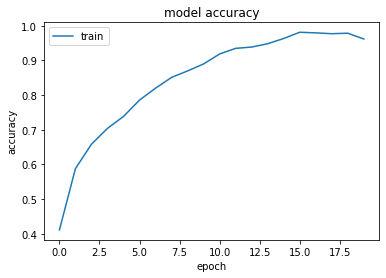

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

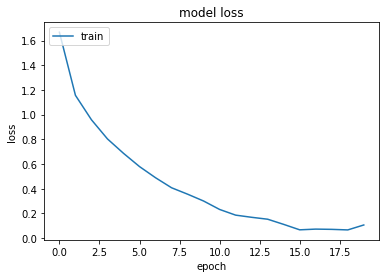

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
img = cv2.imread('Elephant_3.jpg')
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict_classes(img)

print (classes)

[2]


In [29]:
def get_animal_name(classes):
    if classes==0:
        return "Airoplane"
    if classes==1:
        return "Bus"
    if classes==2:
        return "Butterfly"
    if classes==3:
        return "Car"
    if classes==4:
        return "Cat"
    if classes==5:
        return "Dog"
    if classes==6:
        return "Elephant"
    if classes==7:
        return "Flower"
    if classes==8:
        return "Horse"
    if classes==9:
        return "Motorbike"

In [30]:
get_animal_name(classes)

'Butterfly'